<a href="https://colab.research.google.com/github/danipapis/AIweek---DL-workshop/blob/master/nn_2_mnist_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eyaler/workshop/blob/master/nn_2_mnist.ipynb)

# 2. How to train and test your network (MNIST)

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import Input, Model
from keras.layers import Dense, Dropout
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Using TensorFlow backend.


In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [0]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

xdim = x_train.shape[1]
ydim = x_train.shape[2]
print(x_train.dtype, y_train.dtype)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
uint8 uint8


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

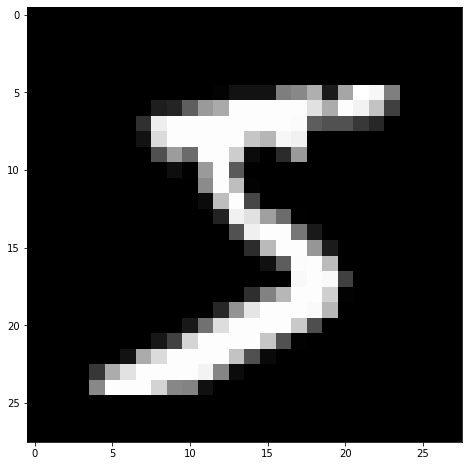

In [0]:
print(x_train[0])
print(y_train[0])
plt.imshow(x_train[0], cmap='gray')

In [0]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True)) #show how many samples for each class
print(np.unique(y_test, return_counts=True))

0 255 0.0
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


In [0]:
n_classes = len(np.unique(y_test))
x_train, y_train = shuffle(x_train, y_train, random_state=44) #shuffle the samples
x_train = x_train.reshape((60000, -1))/255
x_test = x_test.reshape((10000, -1))/255
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [0]:
y_test #print one-hot encoding representation for each sample in test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
rate=0.5

def get_model():
    inputs = Input(shape=(784,)) #784=28*28 input size
    f = Dense(512, activation='relu')(inputs)
    f = Dropout(rate)(f)
    f = Dense(512, activation='relu')(f)
    f = Dropout(rate)(f)
    outputs = Dense(n_classes, activation='softmax')(f) #softmax because it's multi-class
    return Model(inputs=inputs, outputs=outputs)

In [0]:
model = get_model()
print(model.summary())
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_split=0.2)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_____________________________________________________

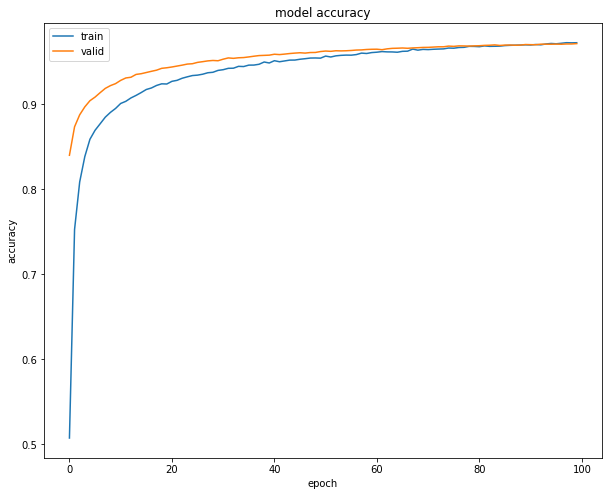

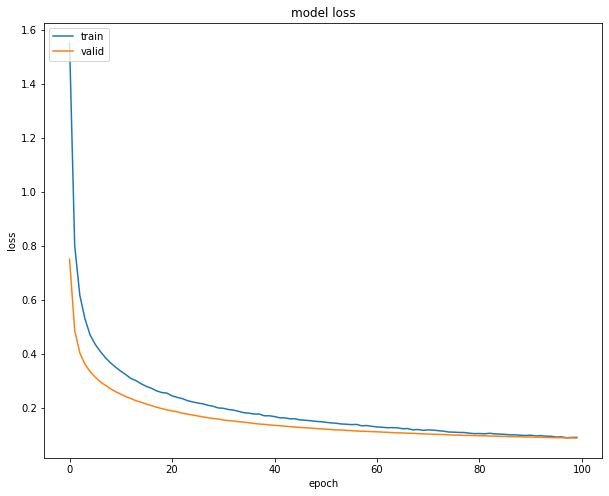

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
loss, acc = model.evaluate(x=x_test, y=y_test)
print(loss, acc)
targets = np.argmax(y_test, axis=-1)
probabilities = model.predict(x=x_test)
predictions = np.argmax(probabilities, axis=-1)
cm = confusion_matrix(y_true=targets, y_pred=predictions)
print(cm)

10000/10000 [==============================] - 1s 56us/step
0.08027307231868618 0.9756
[[ 970    0    0    2    0    1    4    1    1    1]
 [   0 1124    3    2    0    1    3    0    2    0]
 [   7    1 1007    2    2    0    2    7    4    0]
 [   0    0    5  988    0    5    0    7    4    1]
 [   1    0    4    0  958    0    4    2    2   11]
 [   4    1    0    4    2  867    7    0    4    3]
 [   4    3    0    1    8    5  934    0    3    0]
 [   2    7   14    2    0    0    0  996    1    6]
 [   3    0    2   11    3    3    5    5  940    2]
 [   4    4    1    6    9    4    1    6    2  972]]


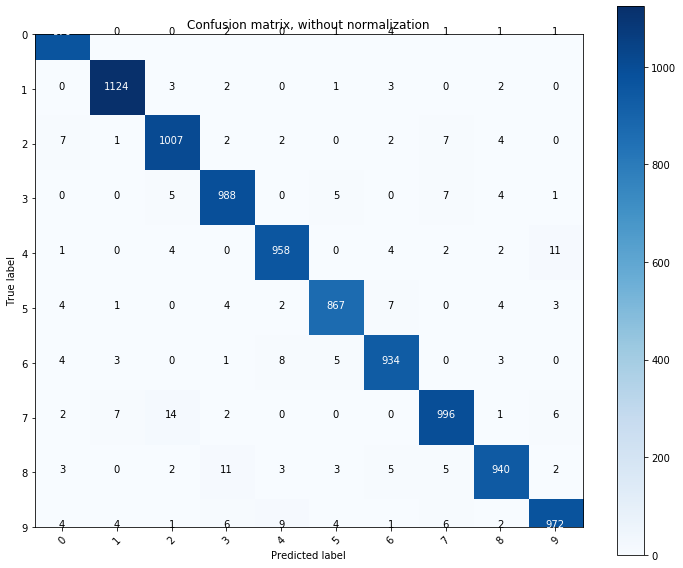

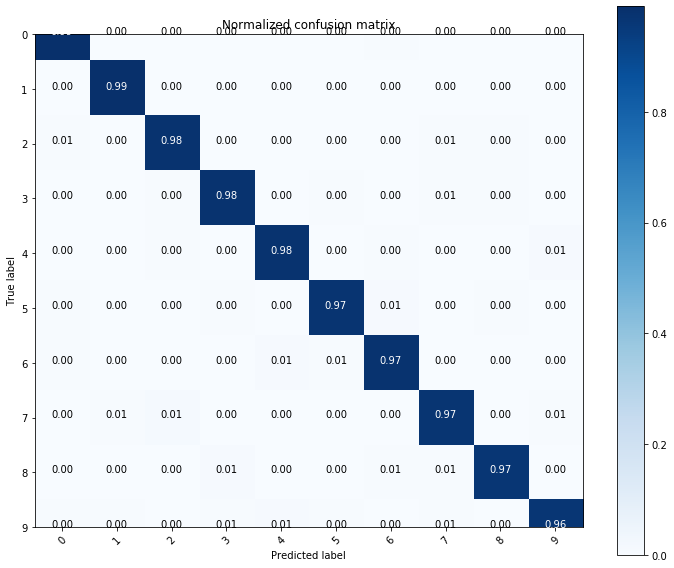

In [0]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    np.set_printoptions(precision=2)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = np.arange(n_classes)
plot_confusion_matrix(cm, classes=classes)
plot_confusion_matrix(cm, classes=classes, normalize=True)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_true=targets, y_pred=predictions, labels=classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



loss	index	true	predicted	probability
1.6205	3520	6	4		0.9991
1.3542	1681	3	7		0.9986
1.3328	2654	6	1		0.9967
1.2700	2648	9	0		0.9937
1.1803	9770	5	0		0.9932
1.0643	2098	2	0		0.9951
1.0535	3597	9	3		0.9893
1.0383	5955	3	8		0.9728
1.0308	9587	9	4		0.9942
1.0293	2927	3	2		0.9912


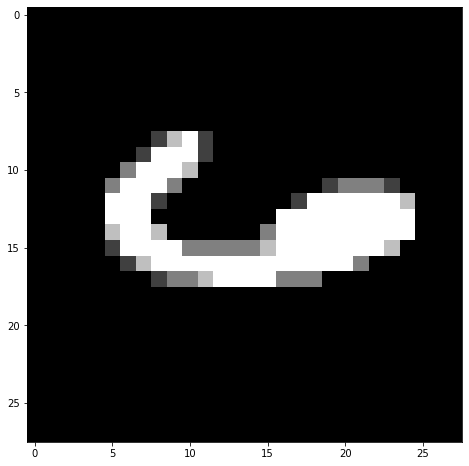

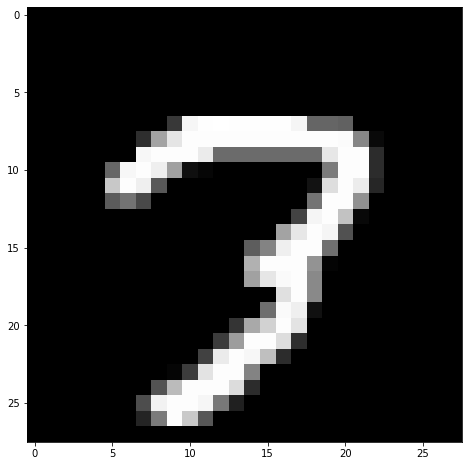

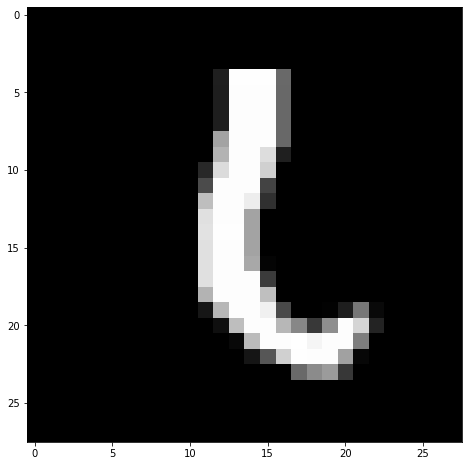

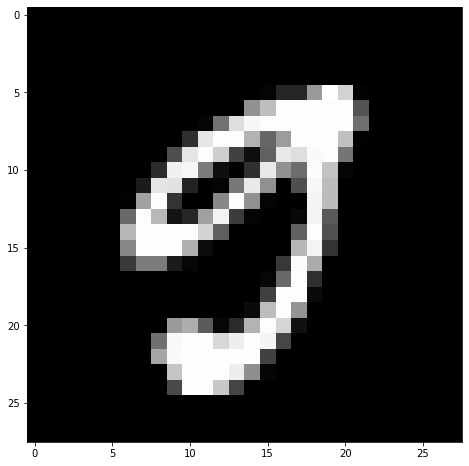

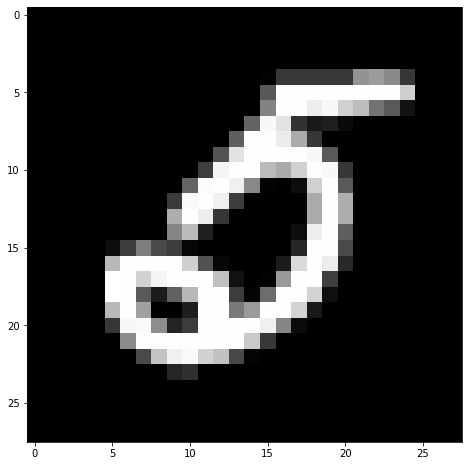

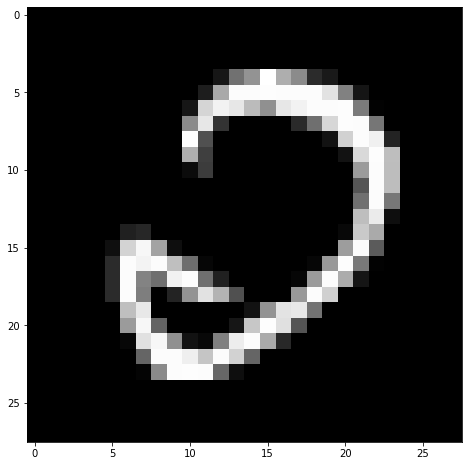

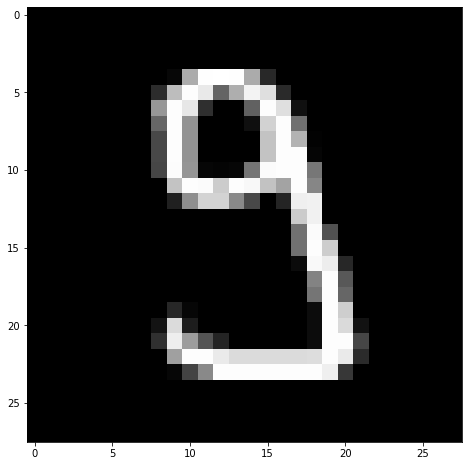

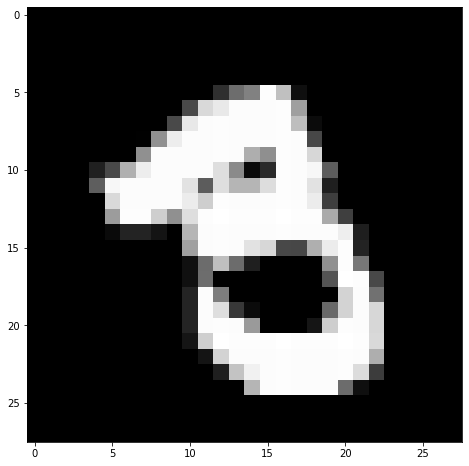

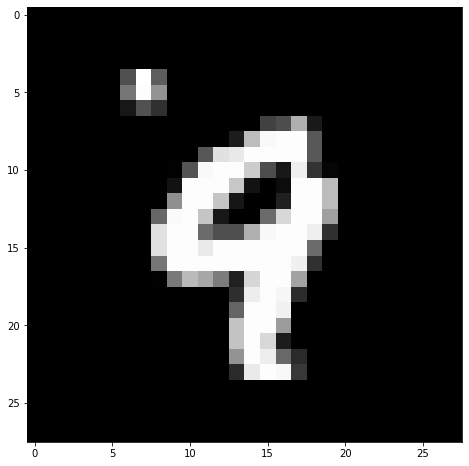

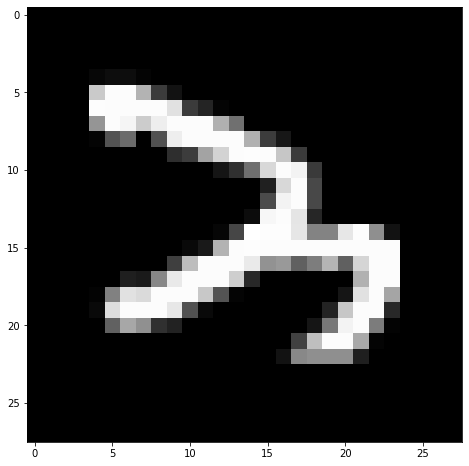

In [0]:
# top errors
from sklearn.metrics import log_loss
max_probs = np.max(probabilities, axis=-1)
losses = [log_loss(y_true=y, y_pred=prob, eps=1e-7) for y,prob in zip(y_test,probabilities)]
print('loss\tindex\ttrue\tpredicted\tprobability')
top_errors = sorted(list(zip(losses, np.arange(10000), targets, predictions, max_probs)), reverse=True)[:10]
for error in top_errors:
    print('%.04f\t%d\t%d\t%d\t\t%.04f'%error)
    plt.figure()
    plt.imshow(x_test[error[1]].reshape((xdim, ydim)), cmap='gray')

#EX:
# 1. Look at the MNIST data
# 2. overfit MNIST - get a very small training error
# 3. add dropout regularization (rate=0.5) for each FC layer, and improve generalization
# 4. evaluate on test and analyze top errors (largest per-sample logloss). what can be learned?
# 5. check sensitivity to random seed
# 6. fix code to work with CIFAR-10 converted to grey scale (look at the data, overfit, generalize, evaluate, etc). don't expect good results on CIFAR-10... try to get val_acc~0.5... try different network architetures